## Sample integration and clustering

https://satijalab.org/seurat/articles/get_started.html

#### Import libraries

In [3]:
library(Seurat)
library(dplyr)
library(magrittr)
library(xlsx)
library(ggplot2)
library(cowplot)
library(forcats)
library(reshape2)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### Load in files

Saline (control) group

In [ ]:
LS_sal.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-SAL-1/raw_feature_bc_matrix")
colnames(LS_sal.data) = paste0(colnames(LS_sal.data),"LS_sal")
LS_sal<- CreateSeuratObject(counts = LS_sal.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_sal))
LS_sal <- RenameCells(LS_sal, new.names = new_LS_barcodes)
LS_sal@meta.data$stim <- "LS_sal"

LS_sal_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_sal/Final_nondoublets_groups_cntl.txt"))
LS_sal_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_sal/Final_doublets_groups_cntl.txt"))
doubletrate_LS_sal<-100*length(LS_sal_doublet)/(length(LS_sal_clean)+length(LS_sal_doublet))
doubletrate_LS_sal
LS_sal<-subset(x=LS_sal,cells=LS_sal_clean)

Chronic morphine group

In [ ]:
LS_mor.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-MOR-1/raw_feature_bc_matrix")
colnames(LS_mor.data) = paste0(colnames(LS_mor.data),"LS_mor")
LS_mor<- CreateSeuratObject(counts = LS_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_mor))
LS_mor <- RenameCells(LS_mor, new.names = new_LS_barcodes)
LS_mor@meta.data$stim <- "LS_mor"

LS_mor_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_mor/Final_nondoublets_groups_cntl.txt"))
LS_mor_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_mor/Final_doublets_groups_cntl.txt"))
doubletrate_LS_mor<-100*length(LS_mor_doublet)/(length(LS_mor_clean)+length(LS_mor_doublet))
doubletrate_LS_mor
LS_mor<-subset(x=LS_mor,cells=LS_mor_clean)

Precipitated withdrawal group

In [ ]:
LS_nal.data <-Read10X(data.dir = "/Users/stuberadmin/Documents/scRNAseq/201130/30-434124718/01_analysis/cellranger_count/LS-NAL-1/raw_feature_bc_matrix")
colnames(LS_nal.data) = paste0(colnames(LS_nal.data),"LS_nal")
LS_nal<- CreateSeuratObject(counts = LS_nal.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
new_LS_barcodes <- gsub("-1","",colnames(LS_nal))
LS_nal <- RenameCells(LS_nal, new.names = new_LS_barcodes)
LS_nal@meta.data$stim <- "LS_nal"

LS_nal_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_nal/Final_nondoublets_groups_cntl.txt"))
LS_nal_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/201130/Doublet_processing/LS_nal/Final_doublets_groups_cntl.txt"))
doubletrate_LS_nal<-100*length(LS_nal_doublet)/(length(LS_nal_clean)+length(LS_nal_doublet))
doubletrate_LS_nal
LS_nal<-subset(x=LS_nal,cells=LS_nal_clean)

Acute morphine group

In [ ]:
LS_one_mor.data <-Read10X(data.dir = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/raw_data/Mor_single/analysis")
colnames(LS_one_mor.data) = paste0(colnames(LS_one_mor.data),"LS_one_mor")
LS_one_mor<- CreateSeuratObject(counts = LS_one_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_one_mor@meta.data$stim <- "LS_one_mor"

LS_one_mor_clean<-rownames(read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/Doublet_processing/LS_one_mor/Final_nondoublets_groups_cntl.txt"))
LS_one_mor_doublet<-rownames(read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/Doublet_processing/LS_one_mor/Final_doublets_groups_cntl.txt"))
doubletrate_LS_one_mor<-100*length(LS_one_mor_doublet)/(length(LS_one_mor_clean)+length(LS_one_mor_doublet))
doubletrate_LS_one_mor

Acute naloxone (drug-naive)

In [ ]:
LS_nal_no_mor.data <-Read10X(data.dir = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/raw_data/Nal_no_mor/analysis")
colnames(LS_nal_no_mor.data) = paste0(colnames(LS_nal_no_mor.data),"LS_nal_no_mor")
LS_nal_no_mor<- CreateSeuratObject(counts = LS_nal_no_mor.data, min.cells = 3, min.features = 200, project = "10X_LS_morphine")
LS_nal_no_mor@meta.data$stim <- "LS_nal_no_mor"

LS_nal_no_mor_clean<-rownames(read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/Doublet_processing/LS_nal_no_mor/Final_nondoublets_groups_cntl.txt"))
LS_nal_no_mor_doublet<-rownames(read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/Doublet_processing/LS_nal_no_mor/Final_doublets_groups_cntl.txt"))
doubletrate_LS_nal_no_mor<-100*length(LS_nal_no_mor_doublet)/(length(LS_nal_no_mor_clean)+length(LS_nal_no_mor_doublet))
doubletrate_LS_nal_no_mor

Adding %mitochondrial reads to metadata

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_sal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_sal, slot = 'counts'))
LS_sal[['percent.mito']] <- percent.mito


In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object =LS_mor, slot = 'counts'))
LS_mor[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal, slot = 'counts'))
LS_nal[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_one_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_one_mor, slot = 'counts'))
LS_one_mor[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS_nal_no_mor), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS_nal_no_mor, slot = 'counts'))
LS_nal_no_mor[['percent.mito']] <- percent.mito

In [ ]:
LS_sal <- subset(x = LS_sal, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.1)
LS_mor<- subset(x = LS_mor, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.1)
LS_nal <- subset(x = LS_nal, subset = nCount_RNA > 500 & nCount_RNA < 25000 & percent.mito < 0.1)

#### Sample normalization, integration, dimensionality reduction, and clustering

In [ ]:
LS_sal<- NormalizeData(object = LS_sal,verbose = FALSE) 
LS_mor<- NormalizeData(object = LS_mor,verbose = FALSE) 
LS_nal<- NormalizeData(object = LS_nal,verbose = FALSE) 
LS_one_mor<- NormalizeData(object = LS_one_mor,verbose = FALSE) 
LS_nal_no_mor<- NormalizeData(object = LS_nal_no_mor,verbose = FALSE) 

In [ ]:
LS_sal<- FindVariableFeatures(object =LS_sal,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = LS_sal))
LS_mor<- FindVariableFeatures(object =LS_mor,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object =LS_mor))
LS_nal<- FindVariableFeatures(object =LS_nal,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = LS_nal))
LS_one_mor<- FindVariableFeatures(object =LS_one_mor,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = LS_one_mor))
LS_nal_no_mor<- FindVariableFeatures(object =LS_nal_no_mor,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = LS_nal_no_mor))

In [ ]:
LS.list<-objects()
LS.list$LS_sal<-LS_sal
LS.list$LS_mor<-LS_mor
LS.list$LS_nal<-LS_nal
LS.list$LS_one_mor<-LS_one_mor
LS.list$LS_nal_no_mor<-LS_nal_no_mor

In [ ]:
reference.list <- LS.list[c("LS_sal","LS_mor","LS_nal","LS_one_mor","LS_nal_no_mor")]
LS.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30) 

In [ ]:
LS.integrated <- IntegrateData(anchorset = LS.anchors, dims = 1:30)

In [ ]:
DefaultAssay(object = LS.integrated) <- "integrated" 

In [ ]:
LS.integrated <- ScaleData(object = LS.integrated, , vars.to.regress = c("nCount_RNA", "percent.mito"),verbose = FALSE)

In [ ]:
LS.integrated <- RunPCA(object = LS.integrated, npcs = 30, verbose = FALSE)

In [ ]:
LS.integrated <- RunUMAP(object = LS.integrated, reduction = "pca", dims = 1:30)

In [ ]:
p1 <- DimPlot(object = LS.integrated, reduction = "umap", group.by = "stim")
plot_grid(p1)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/allcell_umap.pdf",width=10,height=10)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/allcell_umap.png",width=10,height=10)

In [ ]:
LS.integrated <- FindNeighbors(object = LS.integrated, dims=1:30)

In [ ]:
LS.integrated <- FindClusters(LS.integrated, resolution = 0.5, dims.use = 1:30, graph.name = "integrated_snn")

Save .rds files

In [ ]:
saveRDS(LS.integrated, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/LS_integrated.rds")
saveRDS(LS_sal, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/LS_sal.rds")
saveRDS(LS_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/LS_mor.rds")
saveRDS(LS_nal, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/LS_nal.rds")
saveRDS(LS_one_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/LS_one_mor.rds")
saveRDS(LS_nal_no_mor, file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS/All_cells/LS_nal_no_mor.rds")

#### Identifying cell types

In [ ]:
DefaultAssay(LS.integrated) <- "RNA"

Manual identification

In [ ]:
F<-FeaturePlot(object =LS.integrated, features = c("Stmn2","Thy1","Aldoc","Aqp4","Tmem119","C1qc","Mog","Opalin","Pdgfra","Gpr17","Cldn5","Tagln","Vtn","Flt1","Spp1","Foxj1","Fam216b","Cspg4"))
ggsave(file="LS_int_feature_all_genes.png",width=10,height=10)

In [7]:
new.ident <- c("Astrocyte1","Oligo1","Neuron1","Neuron2","Neuron3","Neuron4","Neuron5","Neuron6","Neuron7","Neuron8","Neuron9","Neuron10","Astrocyte2","Neuron11","Neuron12","OPC1","Microglia1","Oligo2","Neuron13","Neuron14","Neuron15","Neuron16","Misc1","Misc2","Misc3","Misc4","Misc5","Misc6","Microglia2","OPC2","Misc7","Neuron17","Neuron18","OPC3","Microglia3","Misc8")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

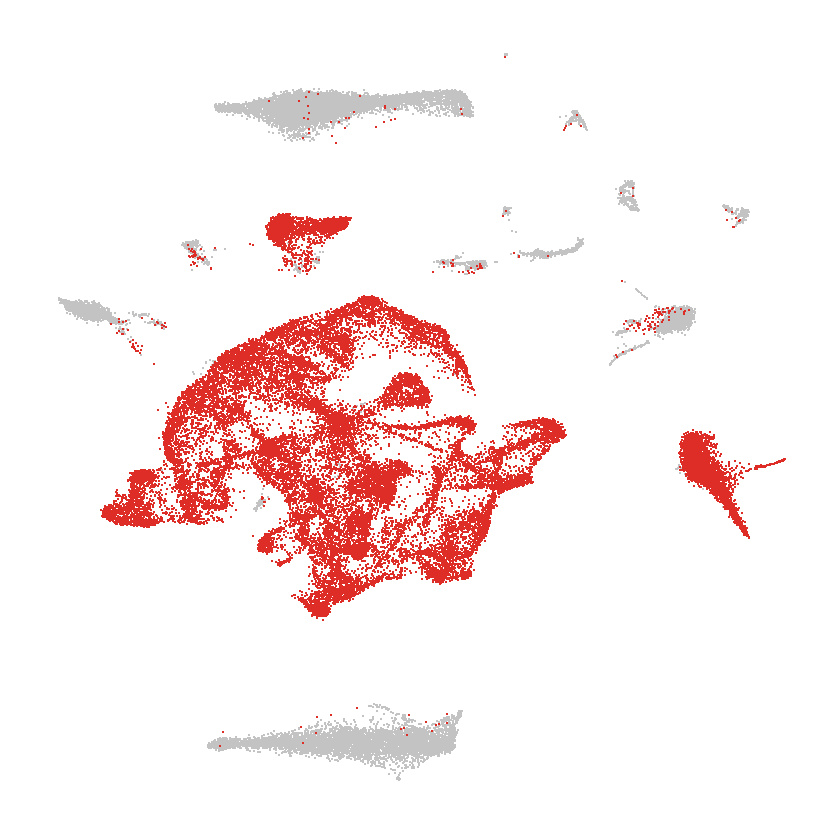

In [14]:
DimPlot(object = LS.integrated, reduction = "umap", label = FALSE, repel = TRUE, pt.size = 0.25, label.size=2.5,cells.highlight=Neuron_barcode, sizes.highlight=0.25, cols.highlight=c('#DE2D26','black')) +
theme_classic() + 
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="/All_cells_neurons_highlight.pdf",width=4,height=4)

Adding cell-type identification to the metadata

In [11]:
celltype<-vector()
for (i in 1:dim(LS.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[LS.integrated@meta.data$integrated_snn_res.0.5[i]])
}
LS.integrated@meta.data$cell_type<-celltype

In [18]:
table(Idents(LS.integrated))


Astrocyte1     Oligo1    Neuron1    Neuron2    Neuron3    Neuron4    Neuron5 
      5118       5103       4196       3844       3090       3055       2451 
   Neuron6    Neuron7    Neuron8    Neuron9   Neuron10 Astrocyte2   Neuron11 
      2336       2236       2030       1904       1812       1769       1716 
  Neuron12       OPC1 Microglia1     Oligo2   Neuron13   Neuron14   Neuron15 
      1660       1604       1394       1344       1142       1027        684 
  Neuron16      Misc1      Misc2      Misc3      Misc4      Misc5      Misc6 
       514        512        435        430        353        273        242 
Microglia2       OPC2      Misc7   Neuron17   Neuron18       OPC3 Microglia3 
       224        181        176        114        113         45         41 
     Misc8 
        20 

Generating "barcode" variables for each cell cluster and each experimental condition

In [8]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}


Generating "barcode" variables for each cell class

In [33]:
Neuron_barcode<-c(Neuron1_barcode,Neuron2_barcode,Neuron3_barcode, Neuron4_barcode,Neuron5_barcode,Neuron6_barcode,Neuron7_barcode,Neuron8_barcode,Neuron9_barcode,Neuron10_barcode,Neuron11_barcode,Neuron12_barcode,Neuron13_barcode,Neuron14_barcode,Neuron15_barcode,Neuron16_barcode)
Neuron_barcode_LS_sal<-intersect(Neuron_barcode,rownames(LS_sal@meta.data))
Neuron_barcode_LS_mor<-intersect(Neuron_barcode,rownames(LS_mor@meta.data))
Neuron_barcode_LS_nal<-intersect(Neuron_barcode,rownames(LS_nal@meta.data))
Neuron_barcode_LS_one_mor<-intersect(Neuron_barcode,rownames(LS_one_mor@meta.data))
Neuron_barcode_LS_nal_no_mor<-intersect(Neuron_barcode,rownames(LS_nal_no_mor@meta.data))

In [ ]:
Astrocyte_barcode<-c(Astrocyte_barcode)
Astrocyte_barcode_LS_sal<-intersect(Astrocyte_barcode,rownames(LS_sal@meta.data))
Astrocyte_barcode_LS_mor<-intersect(Astrocyte_barcode,rownames(LS_mor@meta.data))
Astrocyte_barcode_LS_nal<-intersect(Astrocyte_barcode,rownames(LS_nal@meta.data))

In [9]:
Microglia_barcode<-c(Microglia1_barcode,Microglia2_barcode,Microglia3_barcode)
Microglia_barcode_LS_sal<-intersect(Microglia_barcode,rownames(LS_sal@meta.data))
Microglia_barcode_LS_mor<-intersect(Microglia_barcode,rownames(LS_mor@meta.data))
Microglia_barcode_LS_nal<-intersect(Microglia_barcode,rownames(LS_nal@meta.data))
Microglia_barcode_LS_one_mor<-intersect(Microglia_barcode,rownames(LS_one_mor@meta.data))
Microglia_barcode_LS_nal_no_mor<-intersect(Microglia_barcode,rownames(LS_nal_no_mor@meta.data))

Saving neuron barcodes for future reclustering

In [ ]:
saveRDS(Neuron_barcode_LS_sal, file="/Neuron_LS_sal_id.rds")
saveRDS(Neuron_barcode_LS_mor, file="/Neuron_LS_mor_id.rds")
saveRDS(Neuron_barcode_LS_nal, file="/Neuron_LS_nal_id.rds")
saveRDS(Neuron_barcode_LS_one_mor, file="/Neuron_LS_one_mor_id.rds")
saveRDS(Neuron_barcode_LS_nal_no_mor, file="/Neuron_LS_nal_no_mor_id.rds")

#### Violin plot for markers

In [ ]:
Cell_type<-rev(c("Neuron1","Neuron2","Neuron3","Neuron4","Neuron5","Neuron6","Neuron7","Neuron8","Neuron9","Neuron10","Neuron11","Neuron12","Neuron13","Neuron14","Neuron15","Neuron16","Neuron17","Neuron18","Astrocyte1","Astrocyte2","Oligo1","Oligo2","OPC1","OPC2","OPC3","Microglia1","Microglia2","Microglia3"))
gene_list<-c("Stmn2" ,"Thy1" ,"Slc4a4","Ntsr2","Pdgfra","Gpr17","Mog","Opalin","Tmem119","C1qc")

In [ ]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode",sep=""))))

Cell_number_t<- data.frame("type" =c(rep(Cell_type[i],L)))
for (p in 1:length(gene_list)){
Cell_number_t[gene_list[p]]<-as.vector(LS.integrated@assays$RNA@data[gene_list[p],eval(parse(text = paste(Cell_type[i],"_barcode",sep="")))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$type)

In [ ]:
df <- melt(Cell_number)

In [ ]:
cell.colors<-c("orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","orange","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray")

In [ ]:
df$type <- factor(df$type, levels=c("Neuron1","Neuron2","Neuron3","Neuron4","Neuron5","Neuron6","Neuron7","Neuron8","Neuron9","Neuron10","Neuron11","Neuron12","Neuron13","Neuron14","Neuron15","Neuron16","Neuron17","Neuron18","Astrocyte1","Astrocyte2","Oligo1","Oligo2","OPC1","OPC2","OPC3","Microglia1","Microglia2","Microglia3"))

In [ ]:
pg <- ggplot(df, aes(x=type, y=value, fill=type, size=.1)) + 
geom_violin(width=3, size=0.1) +
stat_summary(fun.y=median, geom="point", size=0.25, color="white")+
theme_classic()+
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
         axis.title=element_text(size=8),
         axis.title.x=element_blank(),
         axis.text.y=element_text(angle=90, hjust=.5),
         plot.title=element_blank())+
    theme(legend.title = element_text(size = 8),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
ggtitle("Gene counts by group") +
ylab('logFC expression')+
scale_fill_manual(values = cell.colors)+
scale_color_manual(values = cell.colors) +
scale_discrete_manual(Cell_number$type, values = c("Neuron1","Neuron2","Neuron3","Neuron4","Neuron5","Neuron6","Neuron7","Neuron8","Neuron9","Neuron10","Neuron11","Neuron12","Neuron13","Neuron14","Neuron15","Neuron16","Neuron17","Neuron18","Astrocyte1","Astrocyte2","Oligo1","Oligo2","OPC1","OPC2","OPC3","Microglia1","Microglia2","Microglia3"))
pg + facet_grid(rows = vars(df$variable)) + NoLegend() +
theme(strip.background = element_rect(color="black", size=0.25, linetype="solid"), strip.text.y = element_text(size = 8),
      panel.background = element_rect(colour = "black", size=.25, fill=NA))

ggsave(file="/Genes_by_cluster.png",width=5,height=5)
ggsave(file="/Genes_by_cluster.pdf",width=5,height=5)
ggsave(file="/Genes_by_cluster.svg",width=5,height=5)

#### Total number of cells per cell class

In [4]:
new.ident <- c("Astrocyte","Oligo","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Astrocyte","Neuron","Neuron","OPC","Microglia","Oligo","Neuron","Neuron","Neuron","Neuron","Misc","Misc","Misc","Misc","Misc","Misc","Microglia","OPC","Misc","Neuron","Neuron","OPC","Microglia","Misc")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [7]:
table(Idents(LS.integrated))


Astrocyte     Oligo    Neuron       OPC Microglia      Misc 
     6887      6447     33924      1830      1659      2441 

In [5]:
Cells_in_clusters <- as.data.frame(table(Idents(LS.integrated)))

In [6]:
colnames(Cells_in_clusters)[1] <- "Cluster"
colnames(Cells_in_clusters)[2] <- "Number"

In [ ]:
Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("Astrocyte","Oligo","Neuron","OPC","Microglia","Misc"))

In [ ]:
Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("Neuron1","Neuron2","Neuron3","Neuron4","Neuron5","Neuron6","Neuron7","Neuron8","Neuron9","Neuron10","Neuron11","Neuron12","Neuron13","Neuron14","Neuron15","Neuron16","Neuron17","Neuron18", "Astrocyte1","Astrocyte2","Oligo1","Oligo2","OPC1","OPC2","OPC3","Microglia1","Microglia2","Microglia3"))

In [ ]:
Cells_in_clusters <- na.omit(Cells_in_clusters)

In [ ]:
p <- ggplot(data=Cells_in_clusters, aes (x=Cluster, y=Number)) +
    geom_bar(stat="identity", position="identity") +
    scale_y_continuous(breaks = seq(0, 2000, by =1000 ), limits=c(0,2000), expand = c(0, 0))+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.1), 
          axis.title.x= element_blank(), 
          axis.text.y=element_text(size=8) ,
          axis.text.x=element_text(angle = 45,hjust = 1, size=8, ) ,
          plot.title=element_text(size=8)) +
    theme(legend.title = element_text(size = 10),
          legend.text = element_text(size = 8), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_blank(),
         axis.title=element_blank(),
         axis.text.y=element_blank())+
ggtitle("Number of cells in each group")+
coord_flip()

ggsave(p, file=("/cell_counts.png"), height=4, width=.5)
ggsave(p, file=("/cell_counts.pdf"), height=4, width=.5)